ISYE 6669 Homework 4 Q2

By: Mark Pearl 

Feburary 14th, 2021

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

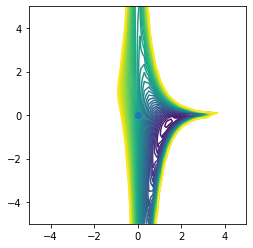

In [33]:
##Q4
func_1  = lambda x: (1-x[0]+x[0]*x[1])**2 + (2-x[0]+x[0]**2*x[1])**2 + (3-x[0]+x[0]**3*x[1])**2

x0 = np.array([0,0])
xs = [x0]

bnds = ((-5, None), (None, 5))
sol1 = minimize(func_1,x0,bounds=bnds)

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y) # meshgrid
XY = np.vstack([X.ravel(), Y.ravel()]) # 2D to 1D vertically
Z = func_1(XY).reshape(50,50) 

xs = np.array(xs)
plt.figure()
plt.contour(X, Y, Z, np.linspace(0,25,50))
plt.plot(xs[:, 0], xs[:, 1], '-o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [34]:
print(sol1)

      fun: 1.16841230720639
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.55191440e-06, -8.61533067e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 9
   status: 0
  success: True
        x: array([ 1.51907511, -0.27672661])


We can see from our 2D result that we have a boxed constraint which is causing the effect of our objective function to look like a diamond since both the upper right and bottom left quadrant our bounded to the constraint. We will have multiple local minimums in this situation as well in both the upper left and bottom right quadrants.

In our case we can see that based on the starting point, our equation is converging to the local optimum position in the bottom right quadrant at x: array([4.87469383, 0.71930641])

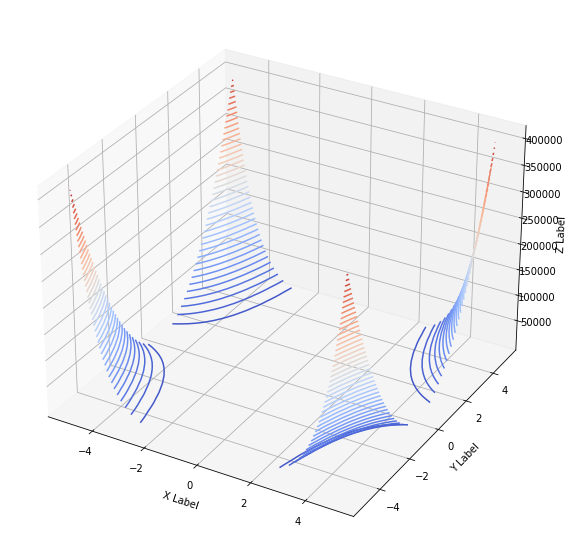

In [35]:
#surf = axes.plot_surface(x, y, z, cmap='coolwarm',linewidth=0, antialiased=True)
fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')

surf = axes.contour3D(X, Y, Z, 50,  cmap='coolwarm')

axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_zlabel('Z Label')

plt.show()

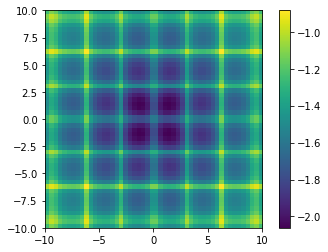

      fun: -1.7906017234221723
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.70414851e-06, -8.70414851e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 3
   status: 0
  success: True
        x: array([-4.4910447, -4.4910447])


In [5]:
#Q5 
func_2  = lambda x: (-0.0001*(np.abs(np.sin(x[0])*np.sin(x[1])*np.exp(abs(100-(np.sqrt((x[0])**2 + (x[1])**2))/np.pi))) +1)**0.1) 
# Make a grid 
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
xg, yg = np.meshgrid(x, y)
plt.figure()
plt.imshow(func_2([xg, yg]), extent=[-10, 10, -10, 10], origin="lower")
plt.colorbar()
plt.show()


bnds = ((-5, None), (None, 5))
local_opt_starting_point = np.array([-5,-5])
local_opt_solution = minimize(func_2,local_opt_starting_point,bounds=bnds)
print(local_opt_solution)

You can see the results from the meshgrid that we have found a local optimal solution at point [-4.4910447, -4.4910447]

Now to try and find two seperate global optimal we'll change the starting points again to something closer to origin, which is where we can see our global optimal solutions are. 

In [37]:
global_opt_starting_point_1 = np.array([-1,-1])
xs = [x0]
global_opt_solution_1 = minimize(func_2,global_opt_starting_point_1,bounds=bnds)
print(global_opt_solution_1)

      fun: -2.0626118707367493
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.13002965e-06, 4.13002965e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 4
   status: 0
  success: True
        x: array([-1.3493867, -1.3493867])


In [38]:
global_opt_starting_point_2 = np.array([1,1])
xs = [x0]
global_opt_solution_2 = minimize(func_2,global_opt_starting_point_2,bounds=bnds)
print(global_opt_solution_2)


      fun: -2.0626118707356023
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.13002965e-06, -4.13002965e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 4
   status: 0
  success: True
        x: array([1.34938657, 1.34938657])


You can see from the above results that we've found two seperate global optimal solutions with the same objective values with two seperate starting points. 

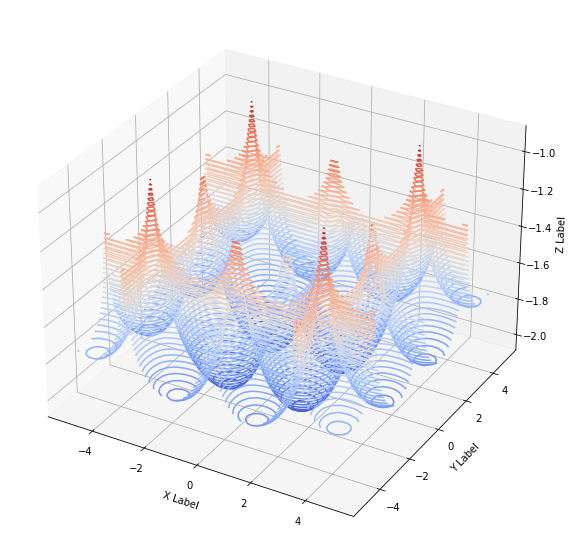

In [8]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y) # meshgrid
XY = np.vstack([X.ravel(), Y.ravel()]) # 2D to 1D vertically
Z = func_2(XY).reshape(50,50) 

fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')

surf = axes.contour3D(X, Y, Z, 50,  cmap='coolwarm')

axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_zlabel('Z Label')

plt.show()